# Data Description

The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as braking and gear changes.

The datasets' positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts.

In [1]:
# setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data exploration


In [2]:
# import data
train = pd.read_csv('data/aps_failure_training_set.csv')
test = pd.read_csv('data/aps_failure_test_set.csv')

In [3]:
print('Number of data points in the training set', train.shape[0])
print('Number of features in the training set', train.shape[1])

Number of data points in the training set 60000
Number of features in the training set 171


In [4]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
print('Number of data points in the test dataset', test.shape[0])
print('Number of features in the test dataset', test.shape[1])

Number of data points in the test dataset 16000
Number of features in the test dataset 171


In [6]:
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [7]:
classes_train = train["class"].value_counts()
classes_train

neg    59000
pos     1000
Name: class, dtype: int64

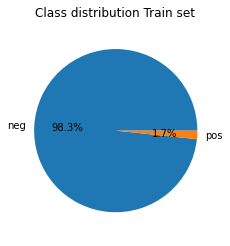

In [8]:
labels = 'neg', 'pos'
sizes = [list(classes_train)[0], list(classes_train)[1]]

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  

plt.title('Class distribution Train set')
plt.savefig("figures/class_dist_train.png", bbox_inches = "tight")
plt.show()

In [9]:
classes_test = test["class"].value_counts()
classes_test

neg    15625
pos      375
Name: class, dtype: int64

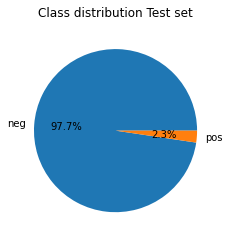

In [10]:
labels = 'neg', 'pos'
sizes = [list(classes_test)[0], list(classes_test)[1]]

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal') 

plt.title('Class distribution Test set')
plt.savefig("figures/class_dist_test.png", bbox_inches = "tight")
plt.show()

In [11]:
# Null values
T1 = train
T2 = test
T1.replace(to_replace=['na','nan'],value = np.NaN,inplace=True)
T2.replace(to_replace=['na','nan'],value = np.NaN,inplace=True)

In [12]:
print("Total number of null values in the training set", T1.isnull().sum().sum())
print("Total number of null values in the test set", T2.isnull().sum().sum())

Total number of null values in the training set 850015
Total number of null values in the test set 228680


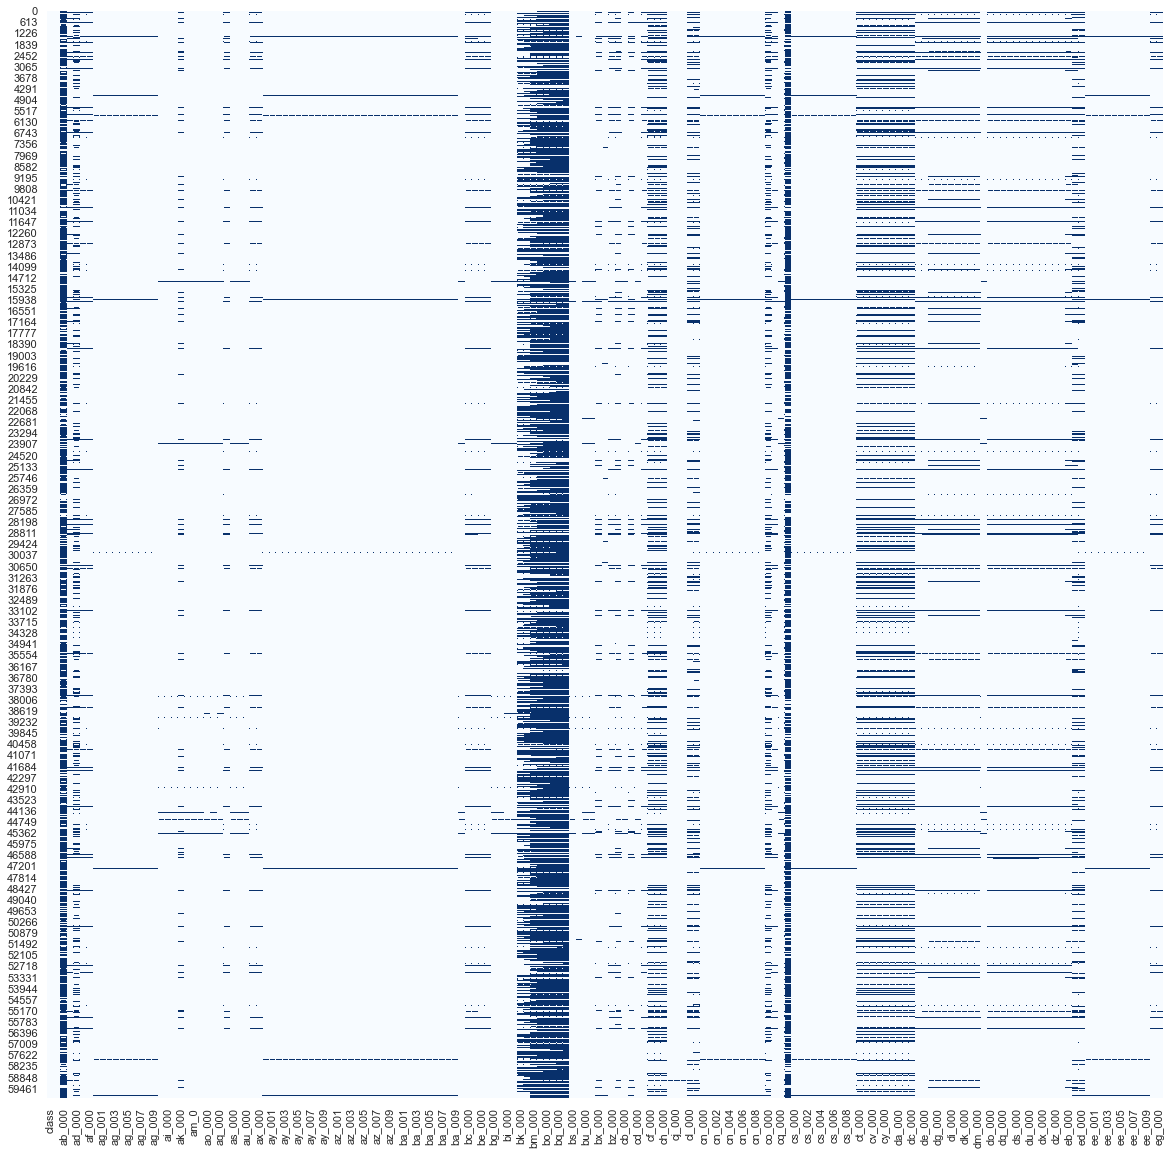

In [13]:
# Distribution null values train set (blue = null value)
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(T1.isnull(), cbar=False, cmap="Blues")
plt.show(plot)

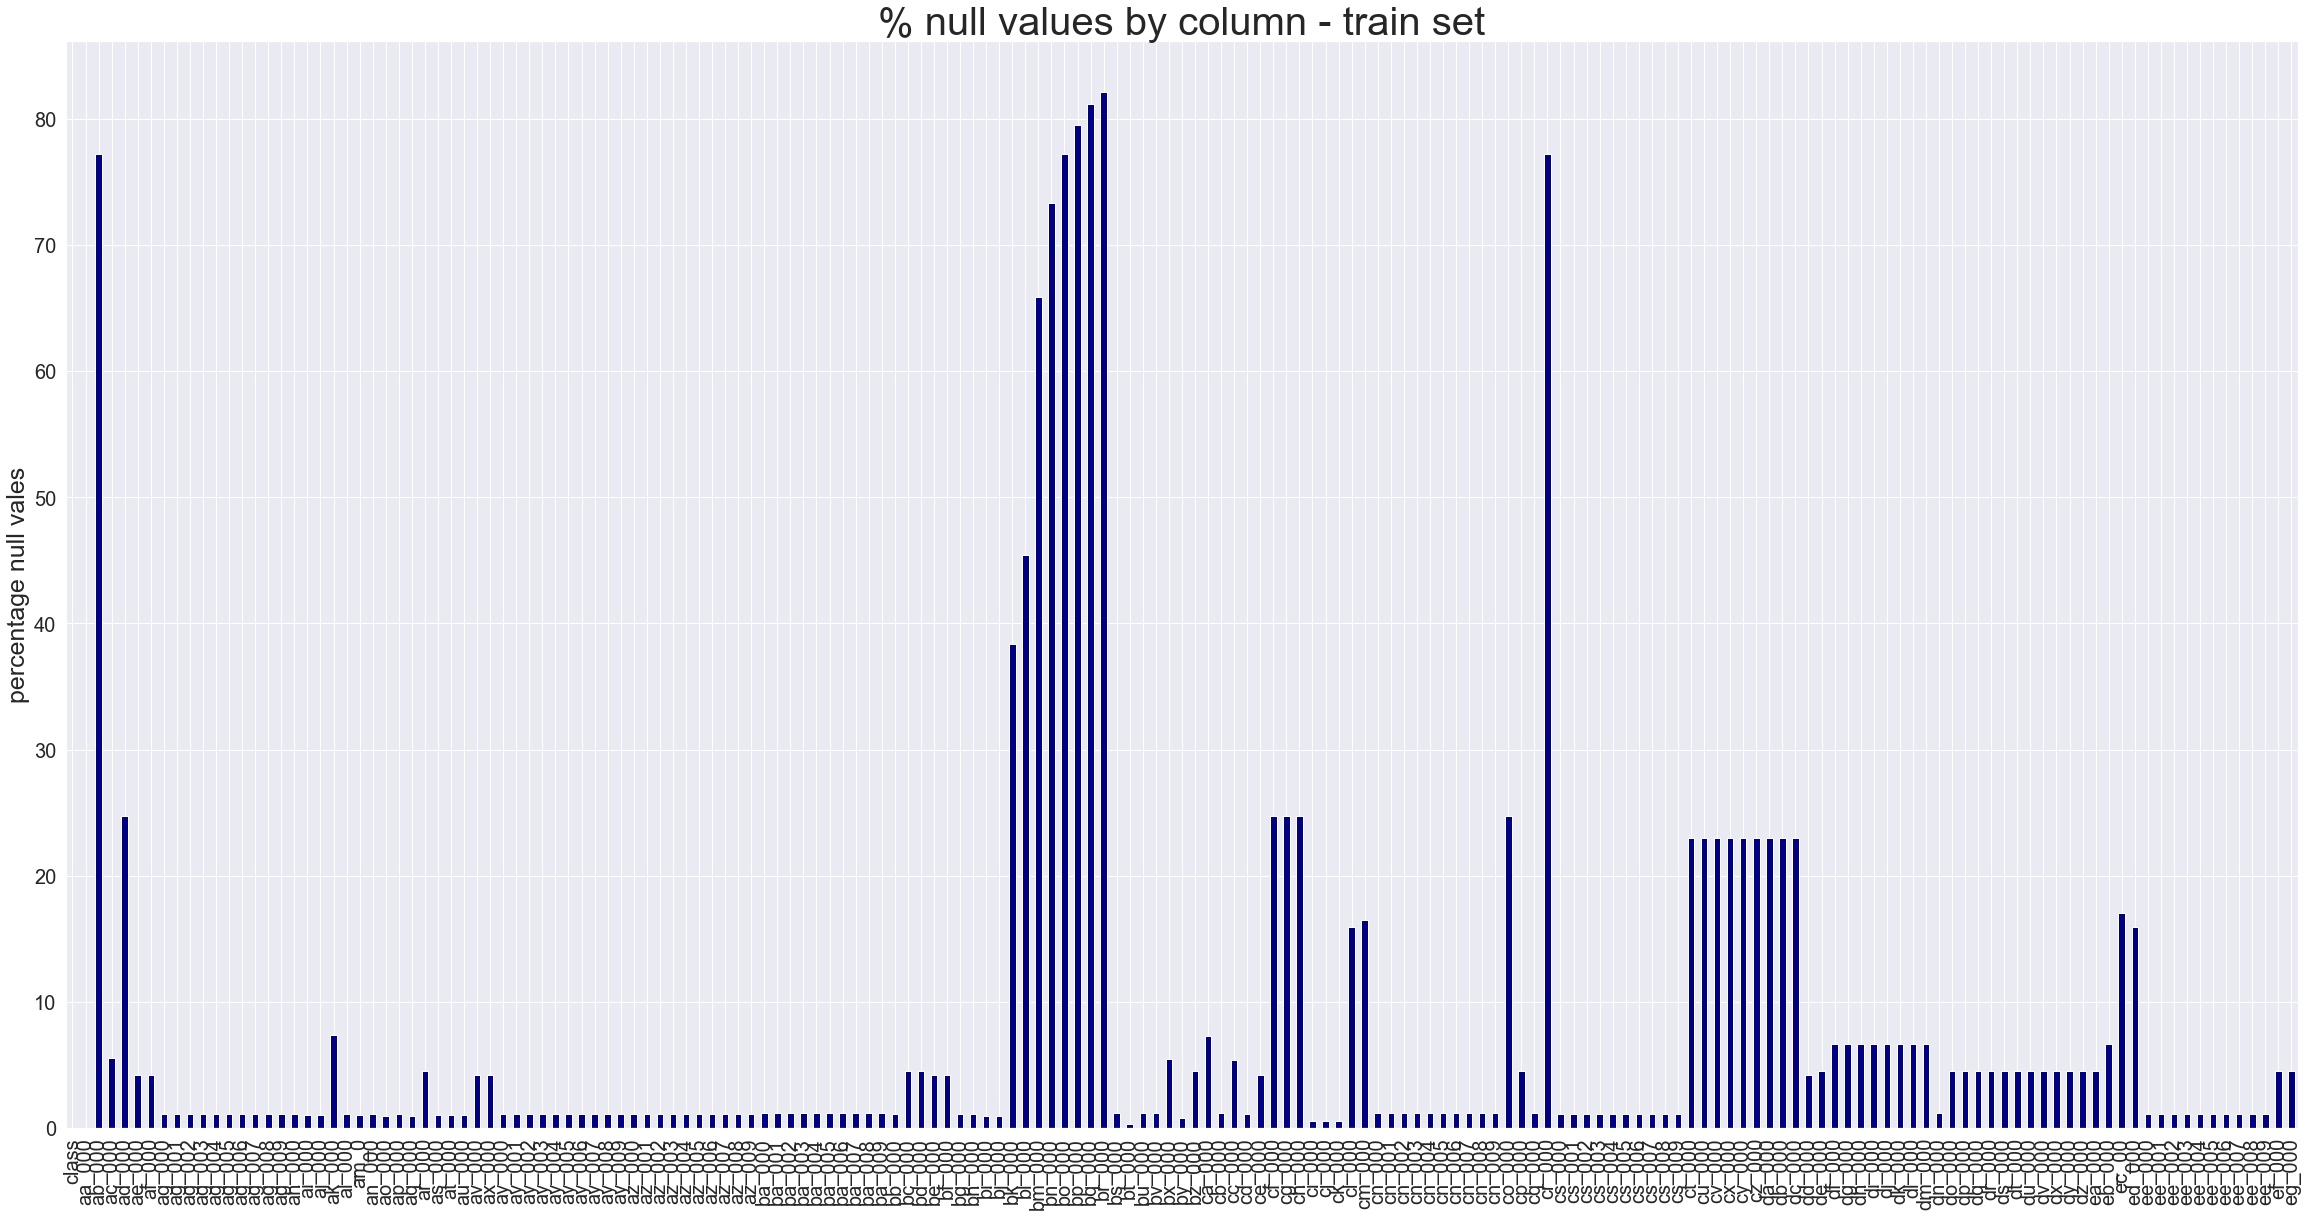

In [14]:
plt.figure()
data = T1.isnull().sum() * 100 / len(T1)
data.plot(kind="bar", colormap='jet', figsize=(40,20), fontsize=20 )
plt.title("% null values by column - train set", fontsize=40)
plt.ylabel('percentage null vales', fontsize=25)
plt.savefig("figures/null_train.png", bbox_inches = "tight")
plt.show()

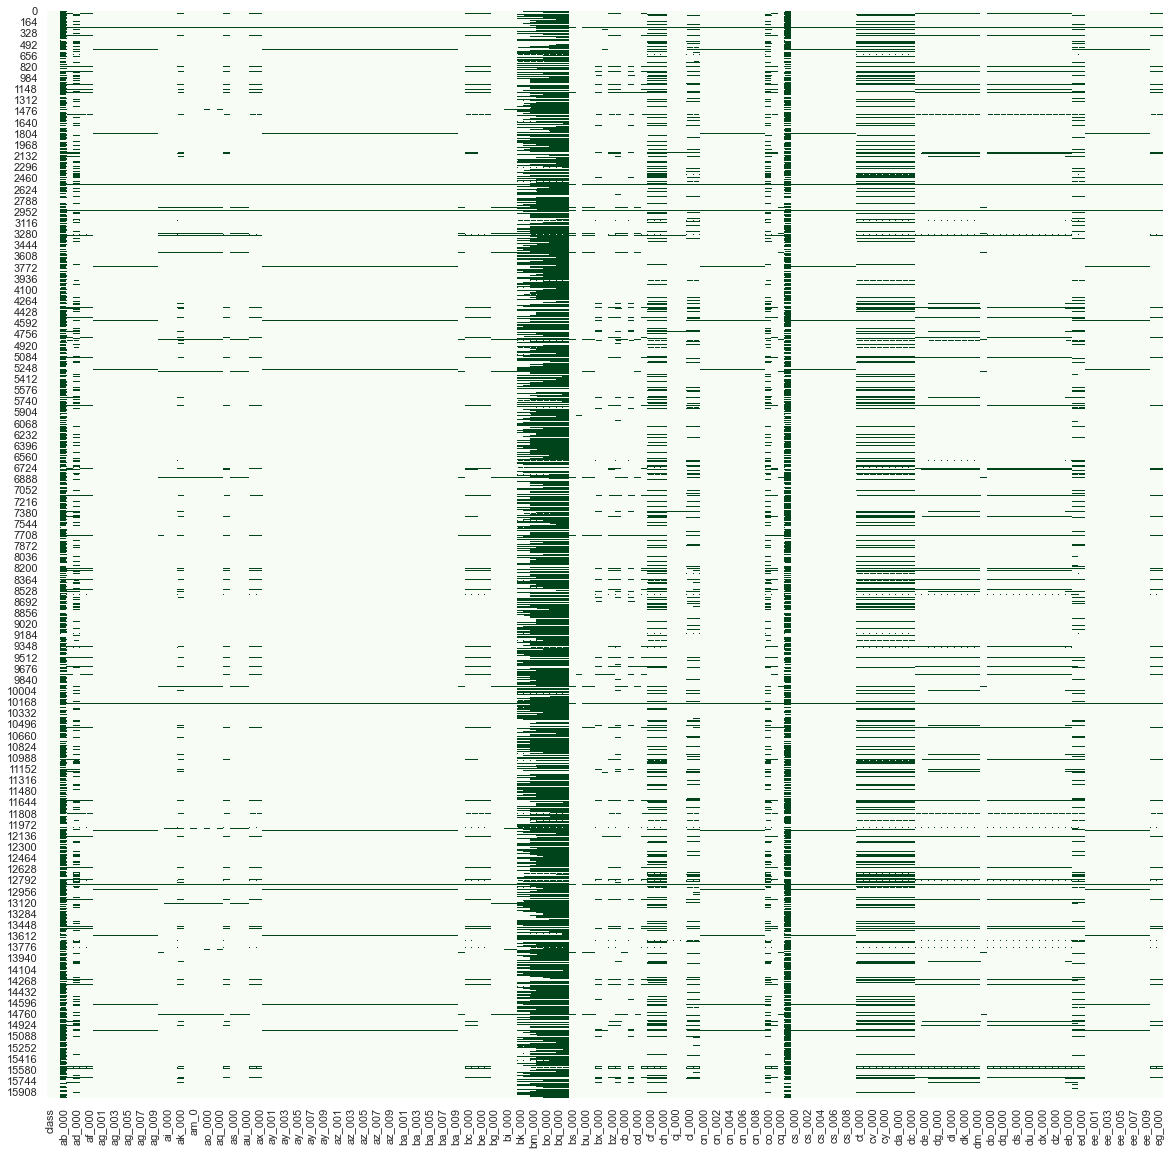

In [15]:
# Distribution null values test set (green = null value)
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(T2.isnull(), cbar=False, cmap="Greens")
plt.show(plot)

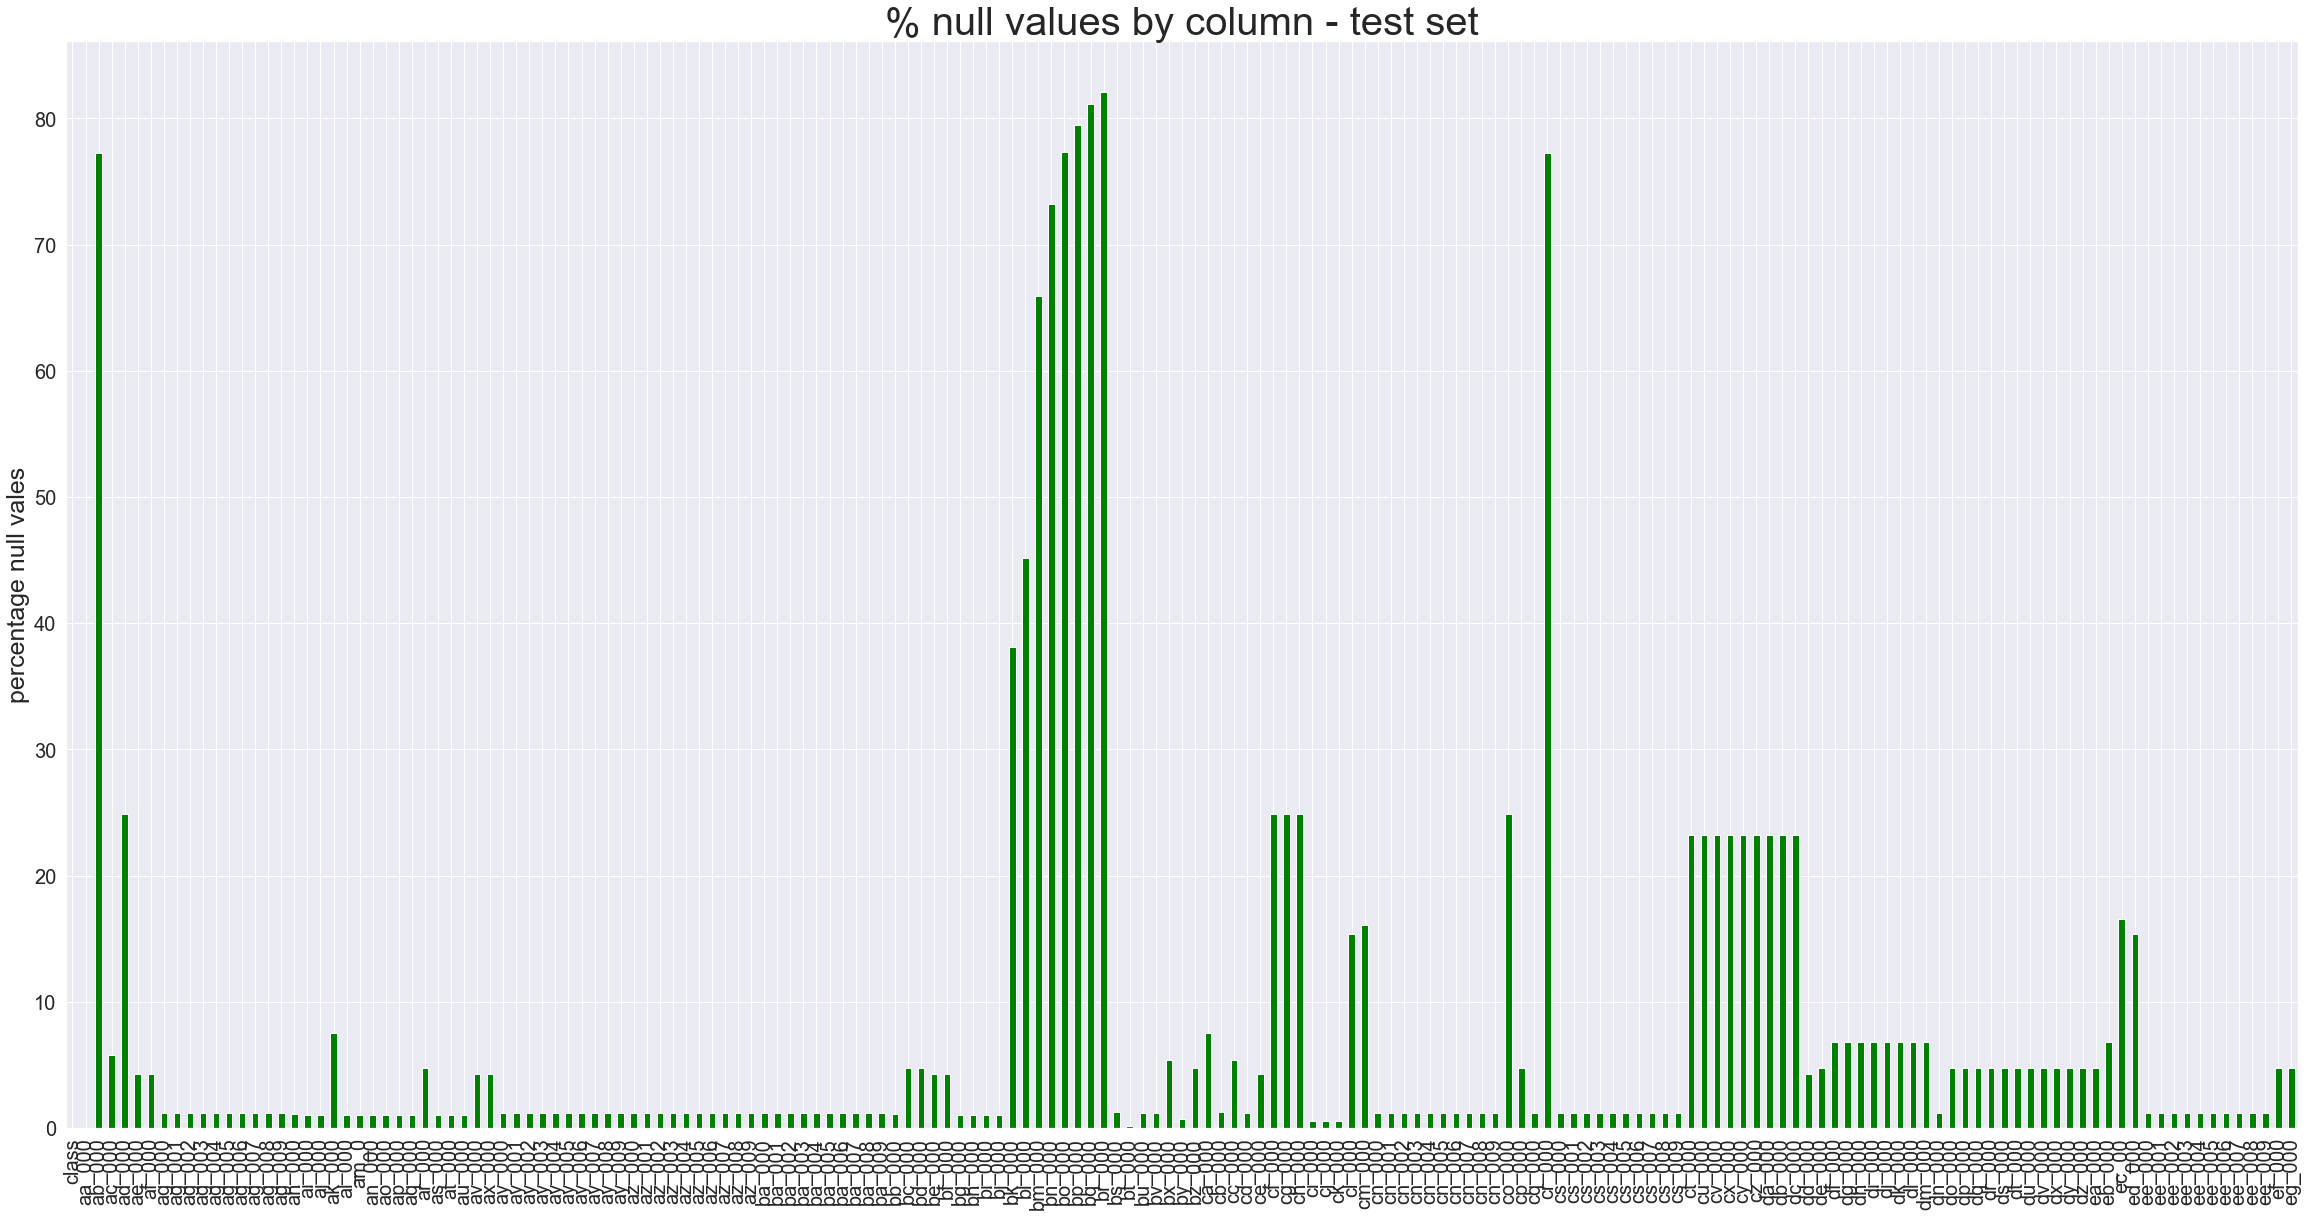

In [16]:
plt.figure()
data = T2.isnull().sum() * 100 / len(test)
data.plot(kind="bar", colormap='ocean', figsize=(40,20), fontsize=20 )
plt.title("% null values by column - test set", fontsize=40)
plt.ylabel('percentage null vales', fontsize=25)
plt.show()